In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial
from sympy import *
from scipy.linalg import solve_banded
from scipy.linalg import lu
from scipy.sparse import dia_matrix
from scipy.linalg import lu_factor, lu_solve

In [2]:
#initial condition & build the matrix
h=0.05
n=19
x=np.ones(n)
ex = np.ones(n)
data = np.array([1*ex, -2 * ex, 1*ex])
offsets = np.array([1, 0, -1])
matrix=dia_matrix((data, offsets), shape=(n, n)).toarray()
b=np.ones(n+1)
t=np.ones(n+1)
for i in range(n+1):
    t[i]=i*h
    b[i]=6*t[i]*h**2
b=np.delete(b,[0])
b[0]=b[0]-1
b[n-1]=b[n-1]-1
#solve the matrix

ab=np.array(np.zeros((3,n),float))
#ab=np.array(ab)
matrix=np.array(matrix)
#print(matrix)
ab[0,1:n]=np.diagonal(matrix,offset=1)
ab[1,]=np.diagonal(matrix)
ab[2,:n-1]=np.diagonal(matrix,offset=-1)
#print(ab)
print(len(t))
x = solve_banded((1, 1), ab, b)
print(len(x))
print("x=",t)

20
19
x= [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]


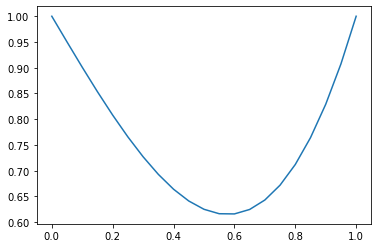

In [3]:
y=np.insert(x,0,1)
y=np.insert(y,n+1,1)
t=np.insert(t,n+1,1)
plt.plot(t,y)

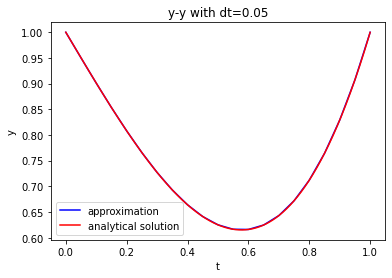

In [5]:
t2=np.arange(0,1.0,0.0001)
y2=t2**3-t2+1
plt.plot(t,y,'b',label='approximation')
plt.plot(t2,y2,'r',label='analytical solution')
plt.xlabel('t')
plt.ylabel('y')
#plt.rcParams['figure.figsize'] = [15,5]
plt.legend()
plt.title('y-y with dt=0.05')
plt.savefig('Q4.png')
plt.show()